In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plot

In [2]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
print(df.isna().sum())
print(df.info())
plot.show()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: floa

In [3]:
print(df['Sex'])
df['Sex']=df['Sex'].replace(['M','F'],[1,0])

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object


/tmp/ipykernel_18/1275725335.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace(['M','F'],[1,0])


In [4]:
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ST_Slope'].value_counts())
ChestPainType={
    'ASY':0,
    'NAP':1,
    'ATA':2,
    'TA':3
    
}
RestingECG={
    'Normal':0,
    'LVH':1,
    'ST':2
    
}
ST_Slope={
    'Up':2,
    'Flat':1,
    'Down':0
}

df['ChestPainType']=df['ChestPainType'].map(ChestPainType)
df['RestingECG']=df['RestingECG'].map(RestingECG)
df['ExerciseAngina']=df['ExerciseAngina'].replace(['N','Y'],[0,1])
df['ST_Slope']=df['ST_Slope'].map(ST_Slope)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


/tmp/ipykernel_18/49124056.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ExerciseAngina']=df['ExerciseAngina'].replace(['N','Y'],[0,1])


In [5]:
print(df.head())
df=df.set_index('Age') 

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              2        130          283          0           2   
3   48    0              0        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


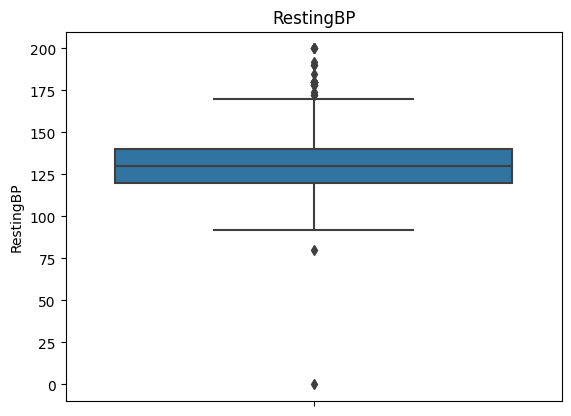

In [6]:
sns.boxplot(data=df,y='RestingBP')
plot.title('RestingBP')
df=df[(df['RestingBP']>=80)&(df['RestingBP']<=170)] 
plot.show()



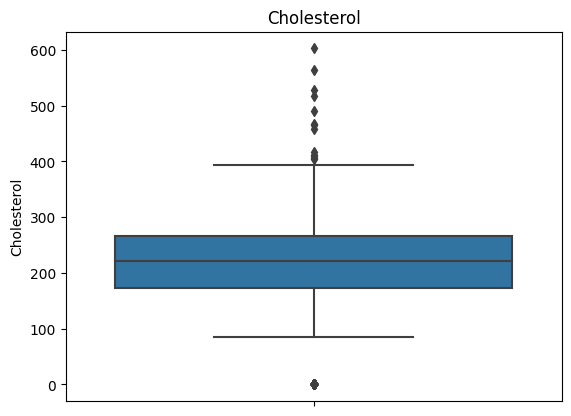

In [7]:
sns.boxplot(data=df,y='Cholesterol')
plot.title('Cholesterol')
plot.show()
df=df[(df['Cholesterol']<=360)&(df['Cholesterol']>=110)] 

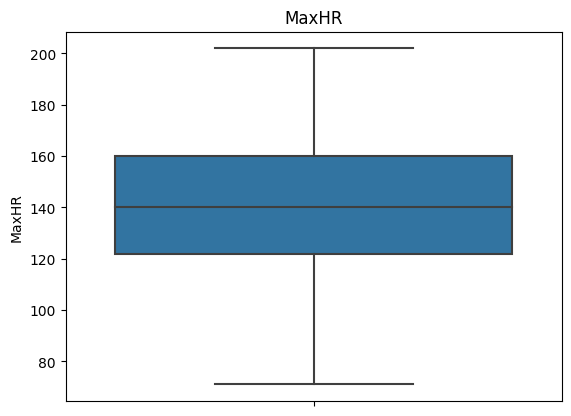

In [8]:
sns.boxplot(data=df,y='MaxHR')
plot.title('MaxHR')
plot.show()
df=df[(df['MaxHR']>=75)] 

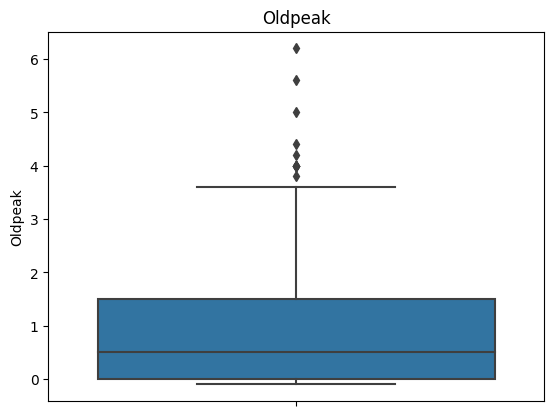

In [9]:
sns.boxplot(data=df,y='Oldpeak')
plot.title('Oldpeak')
plot.show()
df=df[(df['Oldpeak']>=-2)&(df['Oldpeak']<=3.7)] 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


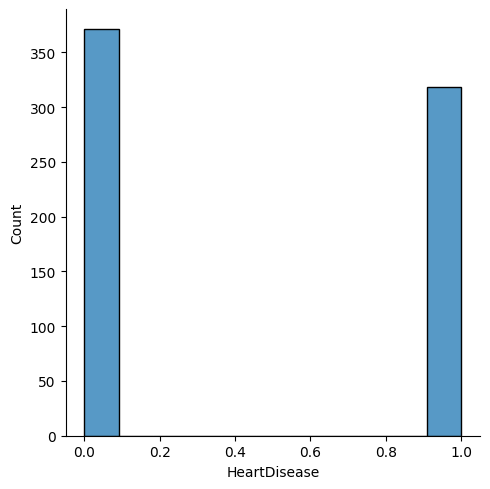

In [10]:
sns.displot(data=df,x='HeartDisease')
plot.show()


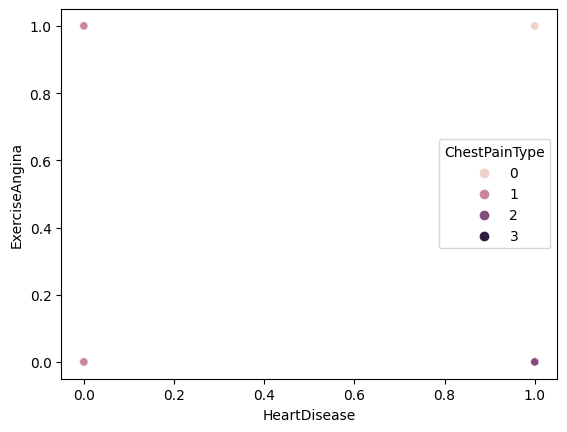

In [11]:

sns.scatterplot(data=df,x='HeartDisease',y='ExerciseAngina',hue='ChestPainType')
plot.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import svm

In [13]:

x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']


In [14]:
print(x.shape)
print(y.shape)

(689, 10)
(689,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
random_state=0)

In [16]:
print (X_train,y_train)
print (X_test,y_test)

clf = svm.LinearSVC(dual=False)

     Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
Age                                                                             
55     1              0        160          289          0           1    145   
60     1              0        142          216          0           0    110   
48     0              1        120          195          0           0    125   
59     1              1        150          212          1           0    157   
38     1              1        145          292          0           0    130   
..   ...            ...        ...          ...        ...         ...    ...   
55     1              0        135          204          1           2    126   
48     1              0        106          263          1           0    110   
52     1              2        120          325          0           0    172   
43     1              0        110          211          0           0    161   
45     1              3     

In [17]:
k = svm.LinearSVC(dual=False)


In [18]:
k.fit(X_train,y_train)

LinearSVC(dual=False)

In [19]:
ll= k.predict(X_test)
print (ll)
y_p = ll
print(classification_report(y_test, y_p))

[0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1
 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       109
           1       0.87      0.91      0.89        98

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207

